# Reduction of Dataset for Analysis

In [1]:
import pandas
from pathlib import Path
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import shutil
from scipy import signal, stats

In [2]:
path_in = Path("/run/media/wernerfeiler/Frei SSD/Ruan_ml_data/W3-6400-3200-nr25")
list_paths = list(path_in.glob("*.png"))

In [3]:
list_paths.sort()
range_list = list(range(0, len(list_paths), 5))
len(list_paths)

8680

In [4]:
list_paths_red = list(np.array(list_paths)[range_list])
len(list_paths_red)

1736

In [5]:
for p in list_paths_red:
    pass
    # shutil.copy(p, Path("/home/wernerfeiler/run_ml_sandvision/data_reduced")/p.name)

# Analysis of the Output Excel Sheet

In [6]:
file_name = Path.cwd() / "data_reduced/data_reduced__eval.xlsx"
df = pd.read_excel(file_name).sort_values("Unnamed: 0").set_index("Unnamed: 0")
df.head(5)

,chamber_center_coords,chamber_dot_coords,sand_coords1,sand_coords2,circle_line__m,circle_line__t,sand_line__m,sand_line__t,angle_rel_sandXchamber_lines,angle_h_abs_sand,angle_h_abs_chamber
Unnamed: 0,,,,,,,,,,,
W3-6400-3200-nr25_1765102300200,"(797, 494)","(1036, 217)","(723, 251)","(850, 700)",1.16,502.28,3.51,-2290.79,24.861337,74.206403,310.788147
W3-6400-3200-nr25_1765102300400,"(802, 510)","(1040, 219)","(718, 260)","(865, 701)",1.22,429.40,3.01,-1900.96,20.962694,71.565051,309.278683
W3-6400-3200-nr25_1765102300600,"(801, 505)","(1041, 221)","(722, 257)","(858, 703)",1.18,467.15,3.29,-2117.60,23.373142,73.041820,310.200164
W3-6400-3200-nr25_1765102300800,"(803, 503)","(1046, 226)","(722, 254)","(858, 703)",1.14,501.65,3.28,-2116.09,24.301699,73.148685,311.259062
W3-6400-3200-nr25_1765102301000,"(803, 506)","(1048, 231)","(727, 256)","(851, 704)",1.12,512.67,3.61,-2369.54,26.277126,74.528672,311.698134


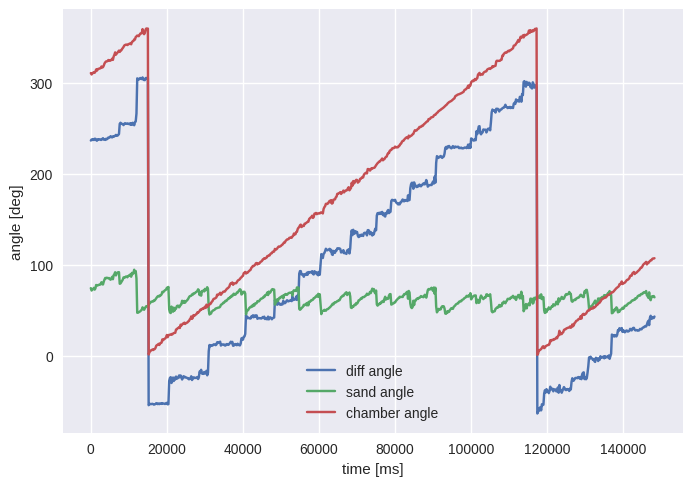

In [7]:
df["diff_angle"] = df["angle_h_abs_chamber"] - df["angle_h_abs_sand"] 
list_time_progress = [int(x.split("_")[-1]) for x in df.index]
list_time_progress_zero = [x-min(list_time_progress) for x in list_time_progress]
df["rel_time"] = list_time_progress_zero

# summary graph of angles
plt.style.use('seaborn-v0_8')
plt.plot(df["rel_time"], df["diff_angle"], label="diff angle")
plt.plot(df["rel_time"], df["angle_h_abs_sand"], label="sand angle")
plt.plot(df["rel_time"], df["angle_h_abs_chamber"], label="chamber angle")
plt.xlabel("time [ms]")
plt.ylabel("angle [deg]")
plt.legend()
plt.savefig("all_angles__W3_example.png", bbox_inches="tight", dpi=150)
plt.show()

In [8]:
max_signal=list(signal.find_peaks(df["angle_h_abs_sand"], distance=20, prominence=3)[0])
max_signal

[37,
 57,
 102,
 153,
 196,
 239,
 271,
 299,
 336,
 370,
 394,
 418,
 451,
 499,
 525,
 566,
 592,
 629,
 652,
 682,
 730]

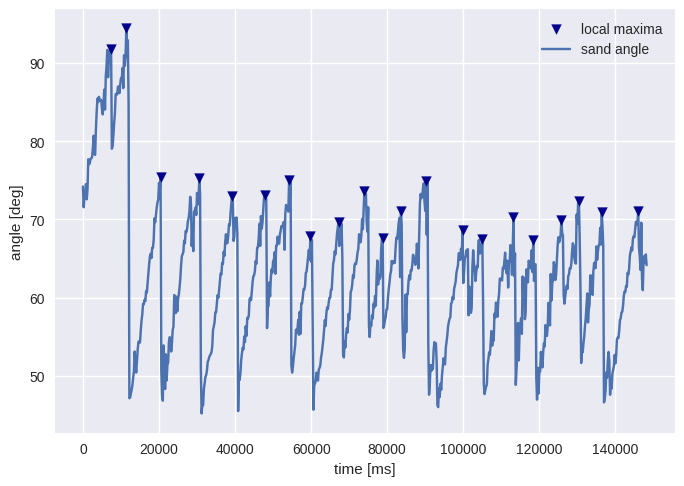

In [9]:
plt.style.use('seaborn-v0_8')
plt.scatter(np.array(df["rel_time"])[max_signal], np.array(df["angle_h_abs_sand"])[max_signal], label="local maxima", marker="v", color="darkblue", zorder=2)
plt.plot(df["rel_time"], df["angle_h_abs_sand"], label="sand angle", zorder=1)
plt.xlabel("time [ms]")
plt.ylabel("angle [deg]")
plt.legend()
plt.savefig("sand_angle__W3_example.png", bbox_inches="tight", dpi=150)
plt.show()

In [10]:
# first 2 beaks originate from initial sand-packing --> sand loses robustness post first sand-slide (sand is clumpy and does not rejoin the "main sand-body")
arr_local_maxima = np.array(df["angle_h_abs_sand"])[max_signal][2::]
min_val = min(arr_local_maxima)
max_val = max(arr_local_maxima)
avg_val = sum(arr_local_maxima)/len(arr_local_maxima)
std_err = stats.sem(arr_local_maxima)

print(f"""
sand properties
---------------
    avg: {round(avg_val, 2)}±{round(std_err, 2)} deg
    min: {round(min_val, 2)} deg
    max: {round(max_val, 2)} deg
""")


sand properties
---------------
    avg: 71.31±0.64 deg
    min: 67.38 deg
    max: 75.49 deg

